In [1]:
import scvelo as scv

In [2]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

# Load data:

The R script has been optimised to merge a Seurat/Loom list to one Loom file, containing the var matrix with spliced, unspliced layers and obs with all embedding, tsne, umap, pca, clustering... This function is called "Convert.seurat_loom()" and saved in "~/Desktop/velocyto/Script/Convert_from_loomR.R".

A Loom file issue from the function above should be saved in the current working folder.

In [3]:
ldata_basal = scv.read("/mnt/Data/Single-cell_Analysis/Projects/External_Projects/Benjamin_D/VM_T/2-RNAvelocity data preparation/KO_IL4C.loom")

# Preprocess the Data

In [4]:
scv.pp.filter_and_normalize(ldata_basal, min_shared_counts=20, n_top_genes=2000)

Filtered out 16242 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.


Here if you have error like: 

In [5]:
scv.pp.moments(ldata_basal, n_pcs=30, n_neighbors=30)

computing neighbors
    finished (0:00:10) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


# Estimate RNA velocity

In [6]:
scv.tl.recover_dynamics(ldata_basal)
scv.tl.velocity(ldata_basal, mode='dynamical')


recovering dynamics (using 1/28 cores)


  0%|          | 0/309 [00:00<?, ?gene/s]

    finished (0:02:12) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [7]:
scv.tl.velocity_graph(ldata_basal)

computing velocity graph
    finished (0:00:03) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


Renamed 'umap_cell_embeddings' to convention 'X_umap_cell_embeddings' (adata.obsm).
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap_cell_embeddings', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_KO_IL4C.png


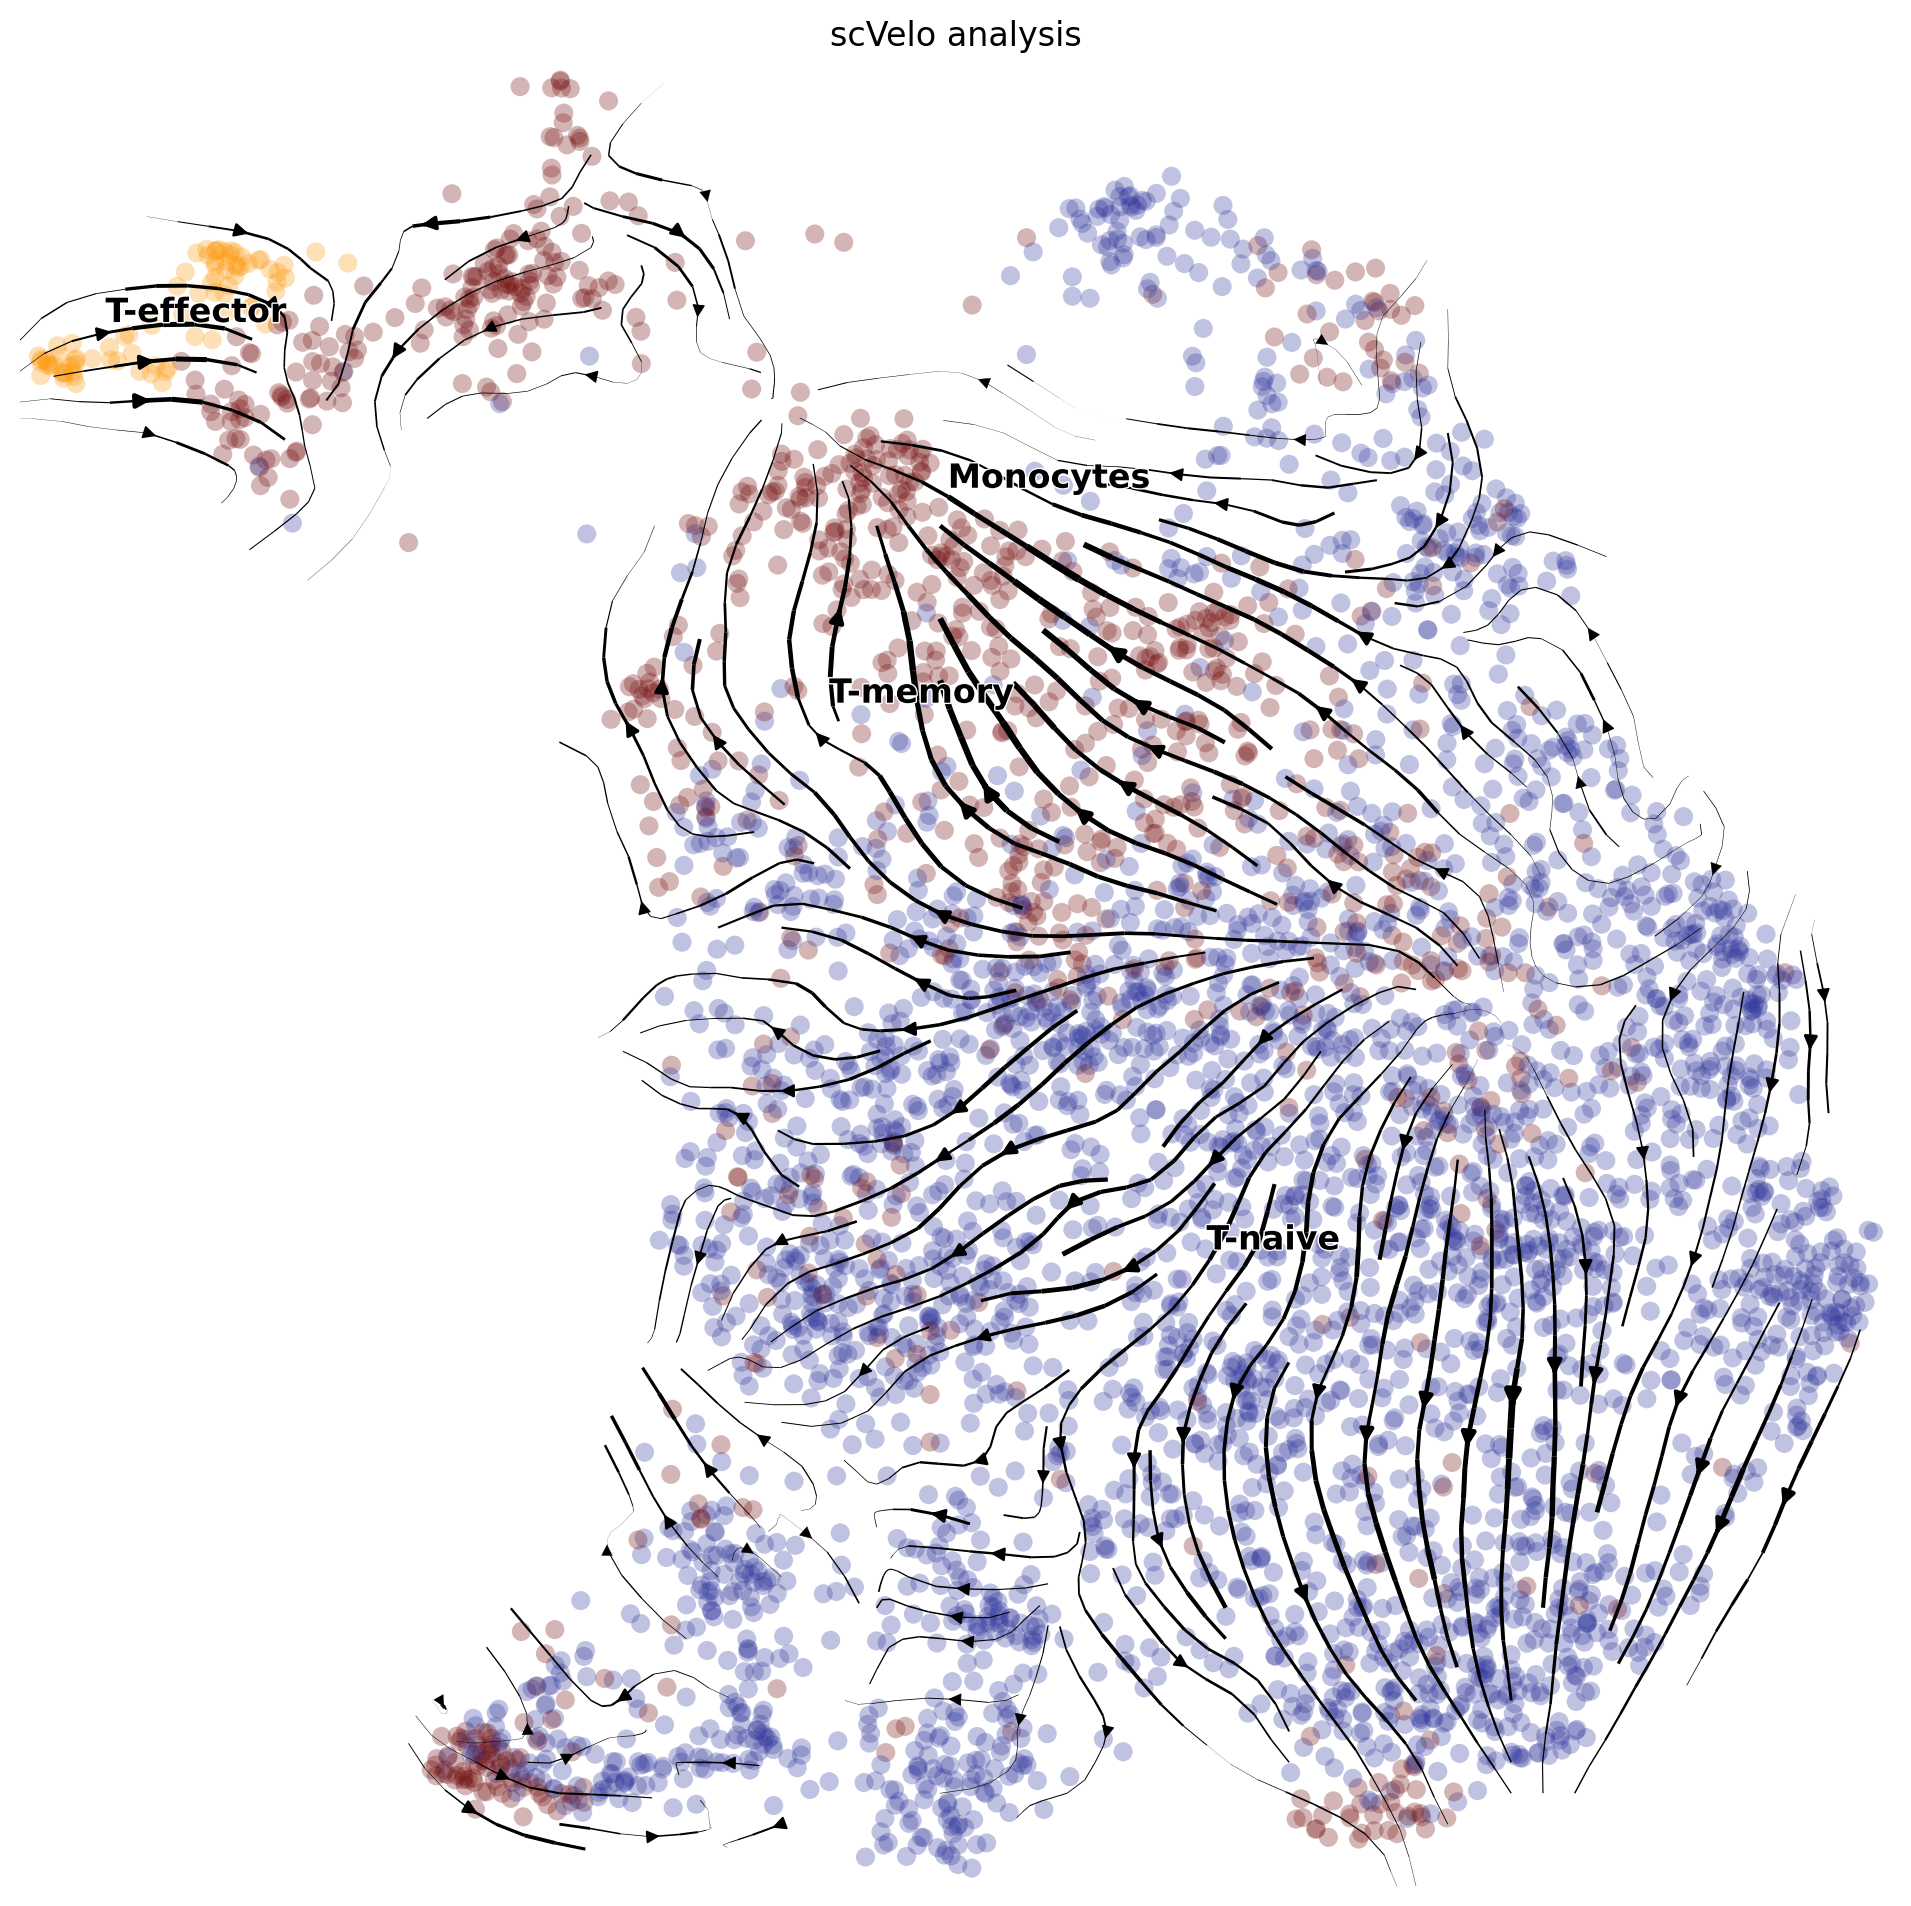

In [8]:
scv.pl.velocity_embedding_stream(ldata_basal, basis='umap_cell_embeddings', color='Annotation', 
                                 figsize=(10,10), components='1,2', 
                                 palette=["#2E359A", "#FC990E", "#720D0D"], 
                                 linewidth=1.4, 
                                 title="scVelo analysis", save="KO_IL4C.png"
                                )